In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "C:/Users/LENOVO User/Downloads/eda/dns.txt"
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

In [3]:
data.head()

,C4653,C5030
2,,
2,C5782,C16712
6,C1191,C419
15,C3380,C22841
18,C2436,C5030
31,C161,C2109


In [4]:
df = pd.read_csv( r"C:\Users\LENOVO User\Downloads\eda\dns.txt", header=None, names=["time","source","resolved"], sep="," )

In [5]:
df.shape

(40821591, 3)

<Axes: ylabel='count'>

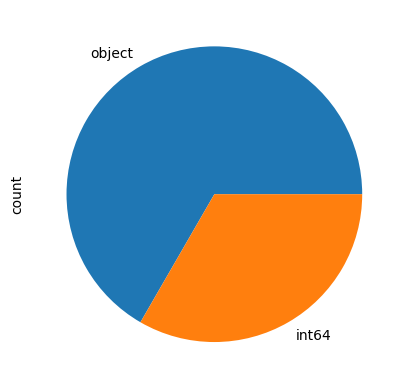

In [6]:
df.dtypes.value_counts().plot.pie()

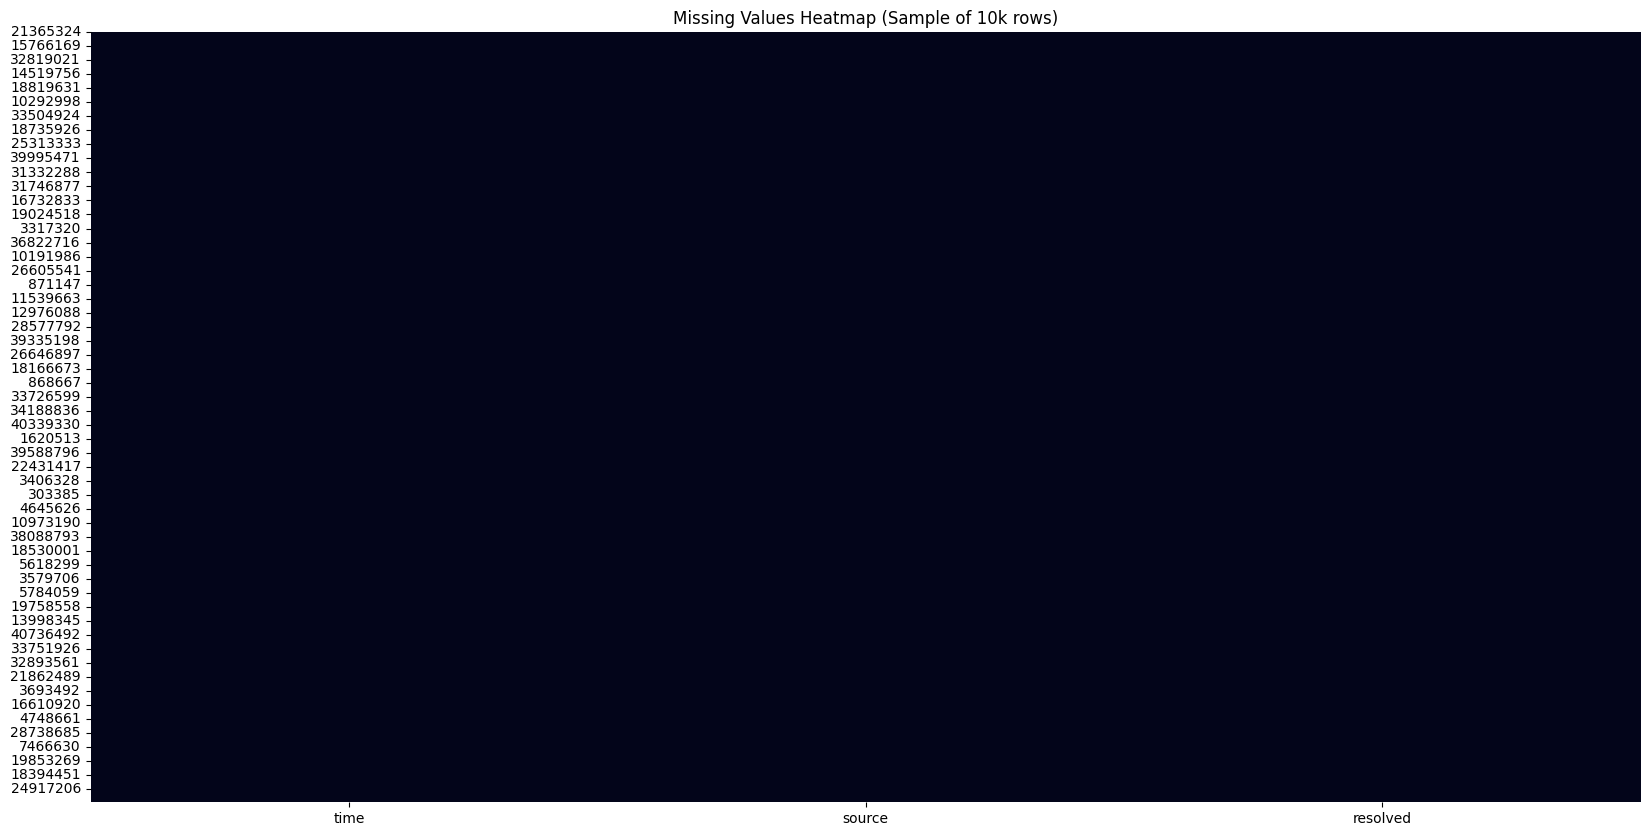

In [7]:
sample_df = df.sample(10000, random_state=42)

plt.figure(figsize=(20,10))
sns.heatmap(sample_df.isna(), cbar=False)
plt.title("Missing Values Heatmap (Sample of 10k rows)")
plt.show()


In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

time        0.0
source      0.0
resolved    0.0
dtype: float64

In [9]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

,time,source,resolved
0,2,C4653,C5030
1,2,C5782,C16712
2,6,C1191,C419
3,15,C3380,C22841
4,18,C2436,C5030


<Axes: >

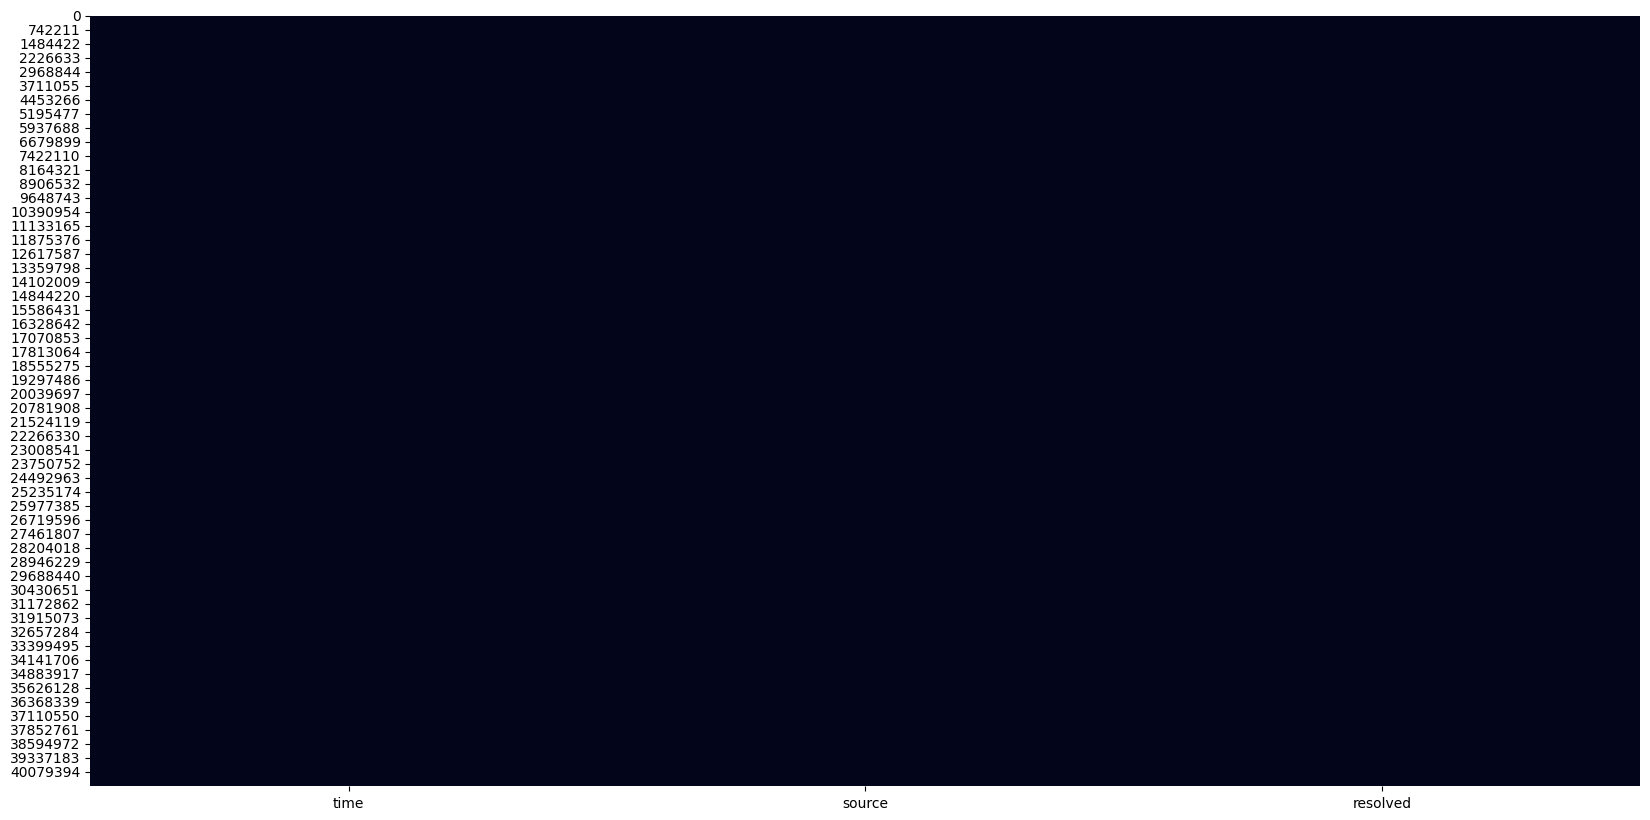

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [11]:
df['source'].value_counts(normalize=True).head(10)

source
C585      0.039807
C743      0.028167
C1823     0.009596
C5741     0.008596
C3380     0.004000
C17490    0.003986
C1193     0.003671
C22235    0.003543
C2091     0.003431
C561      0.003387
Name: proportion, dtype: float64

In [12]:
df['resolved'].value_counts(normalize=True).head(10)

resolved
C1707    0.131655
C1685    0.127983
C5030    0.114107
C586     0.109973
C754     0.059210
C1025    0.057165
C706     0.051411
C1065    0.021398
C2189    0.020662
C457     0.020105
Name: proportion, dtype: float64

<Axes: xlabel='hour'>

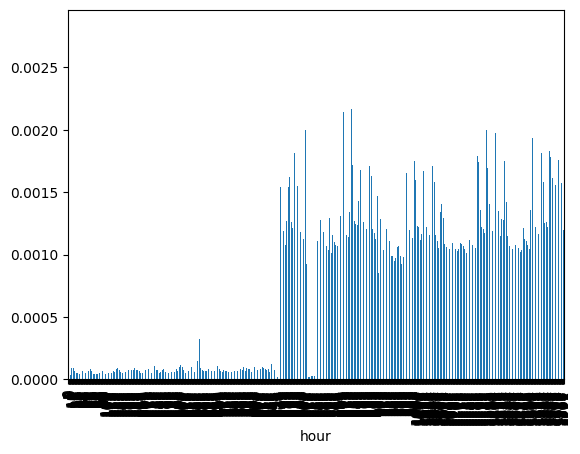

In [13]:
df['hour'] = df['time'] // 3600
df['hour'].value_counts(normalize=True).sort_index().plot(kind='bar')


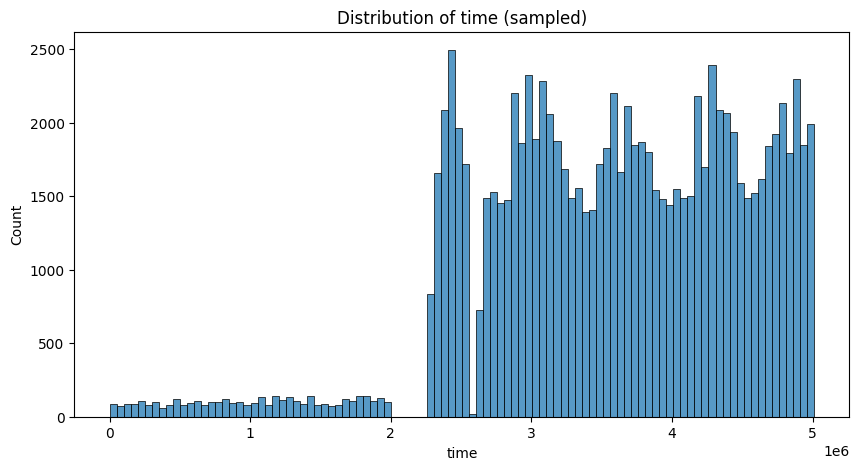

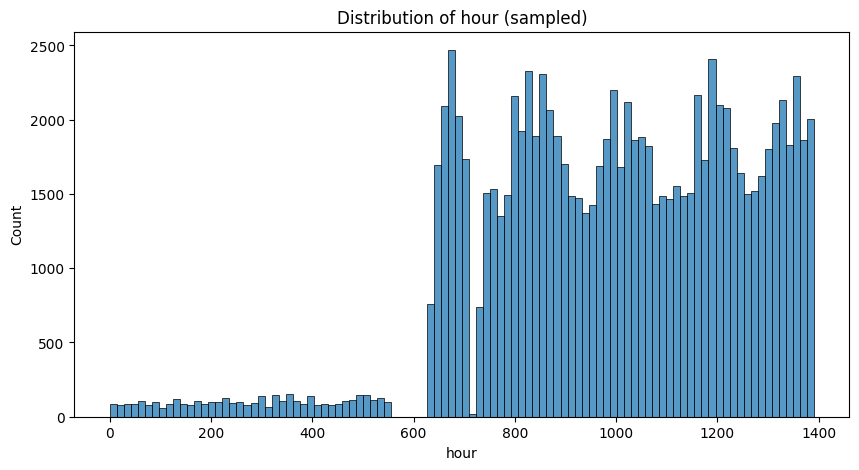

In [14]:
sample_df = df.sample(100000, random_state=42)

for col in sample_df.select_dtypes(include=['int64','float']):
    plt.figure(figsize=(10,5))
    sns.histplot(sample_df[col], bins=100, kde=False)
    plt.title(f"Distribution of {col} (sampled)")
    plt.show()


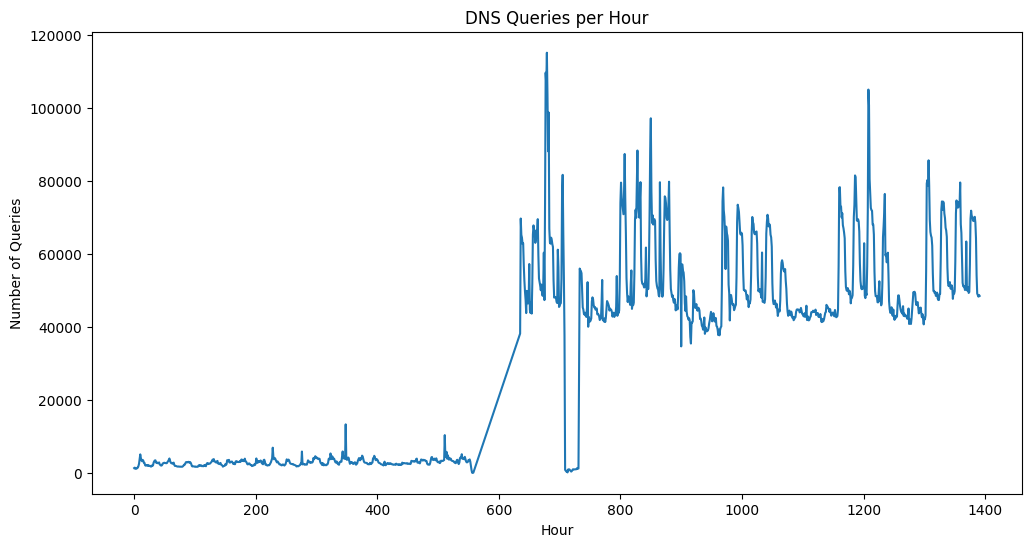

In [15]:
df['hour'] = df['time'] // 3600
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
hourly_counts.plot(kind='line')
plt.title("DNS Queries per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Queries")
plt.show()


In [16]:
# Frequency of source computers
print(df['source'].value_counts())

# Frequency of resolved computers
print(df['resolved'].value_counts())

# Normalize to get proportions instead of raw counts
print(df['source'].value_counts(normalize=True).head(10))
print(df['resolved'].value_counts(normalize=True).head(10))


source
C585      1624999
C743      1149807
C1823      391719
C5741      350885
C3380      163298
           ...   
C8182           1
C23578          1
C705            1
C22327          1
C15964          1
Name: count, Length: 15013, dtype: int64
resolved
C1707     5374369
C1685     5224450
C5030     4658033
C586      4489267
C754      2417026
           ...   
C15009          1
C27007          1
C17740          1
C20706          1
C13243          1
Name: count, Length: 13776, dtype: int64
source
C585      0.039807
C743      0.028167
C1823     0.009596
C5741     0.008596
C3380     0.004000
C17490    0.003986
C1193     0.003671
C22235    0.003543
C2091     0.003431
C561      0.003387
Name: proportion, dtype: float64
resolved
C1707    0.131655
C1685    0.127983
C5030    0.114107
C586     0.109973
C754     0.059210
C1025    0.057165
C706     0.051411
C1065    0.021398
C2189    0.020662
C457     0.020105
Name: proportion, dtype: float64


In [17]:
df['hour'] = df['time'] // 3600
print(df['hour'].value_counts().sort_index())

hour
0        1273
1        1401
2        1081
3        1099
4        1116
        ...  
1387    49158
1388    48710
1389    48305
1390    48771
1391    48499
Name: count, Length: 1315, dtype: int64


In [18]:
# Always sample first
sample_df = df.sample(100000, random_state=42)

for col in sample_df.select_dtypes('object'):
    print(f'{col :-<50} {sample_df[col].unique()[:20]}')
    print(f"Unique count in sample: {sample_df[col].nunique()}")
    print("-"*80)


source-------------------------------------------- ['C1516' 'C17475' 'C552' 'C585' 'C19501' 'C9101' 'C9956' 'C22792' 'C23278'
 'C7978' 'C13244' 'C24848' 'C19312' 'C9918' 'C26523' 'C17490' 'C18548'
 'C18421' 'C11772' 'C8891']
Unique count in sample: 13101
--------------------------------------------------------------------------------
resolved------------------------------------------ ['C754' 'C1707' 'C1025' 'C586' 'C1685' 'C2915' 'C612' 'C706' 'C529'
 'C2189' 'C625' 'C5030' 'C743' 'C21300' 'C457' 'C22841' 'C12469' 'C528'
 'C10357' 'C467']
Unique count in sample: 1946
--------------------------------------------------------------------------------


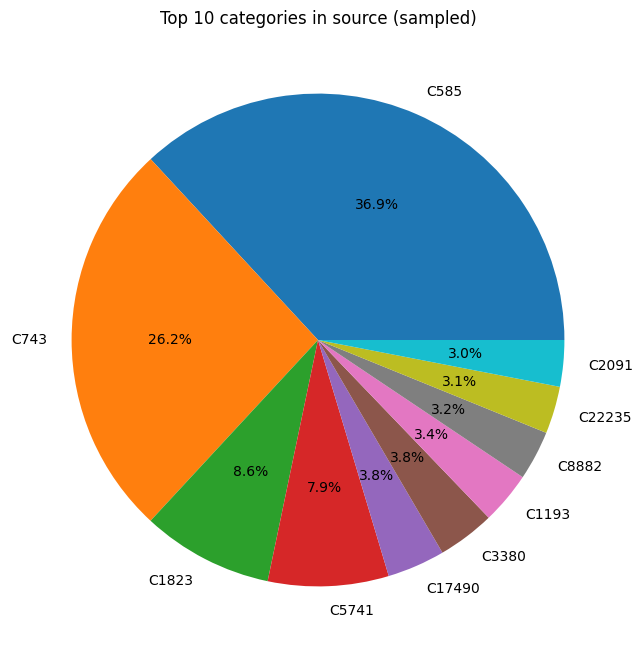

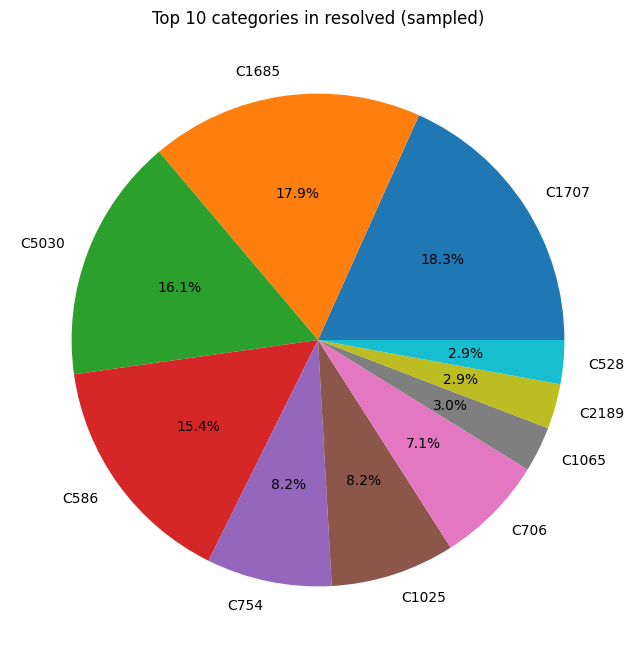

In [19]:
import matplotlib.pyplot as plt

# Always sample first
sample_df = df.sample(100000, random_state=42)

for col in sample_df.select_dtypes('object'):
    plt.figure(figsize=(8,8))
    sample_df[col].value_counts().head(10).plot.pie(autopct='%1.1f%%')
    plt.title(f"Top 10 categories in {col} (sampled)")
    plt.ylabel("")  # remove y-label for cleaner plot
    plt.show()


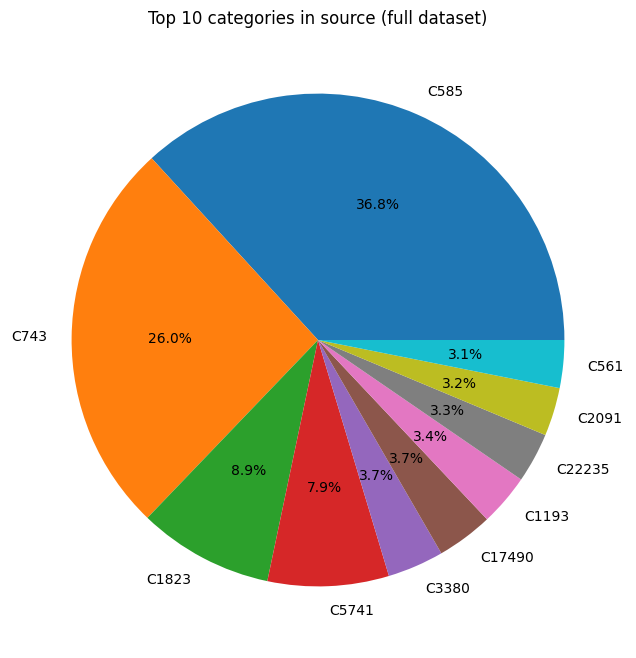

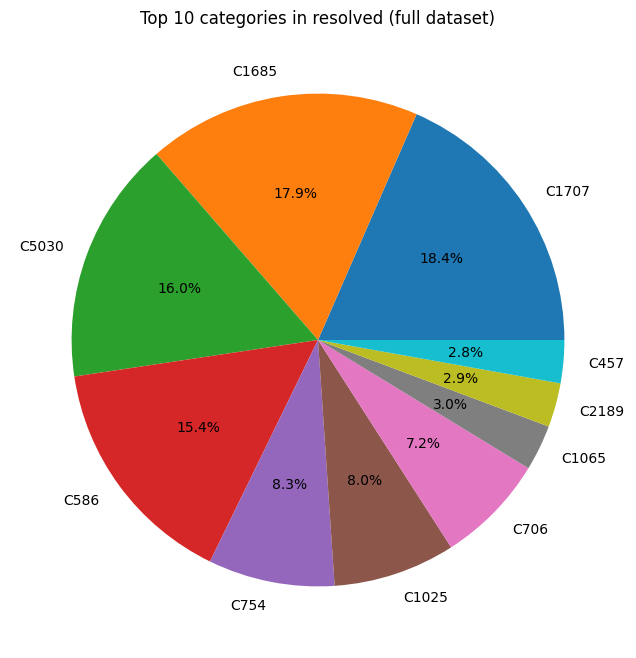

In [20]:
import matplotlib.pyplot as plt

for col in df.select_dtypes('object'):
    plt.figure(figsize=(8,8))
    df[col].value_counts().head(10).plot.pie(autopct='%1.1f%%')
    plt.title(f"Top 10 categories in {col} (full dataset)")
    plt.ylabel("")  # remove y-label for cleaner plot
    plt.show()


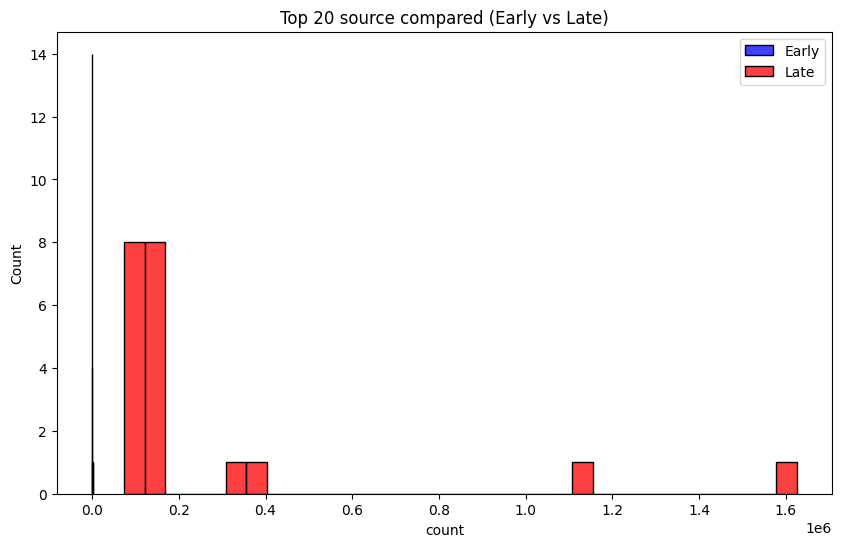

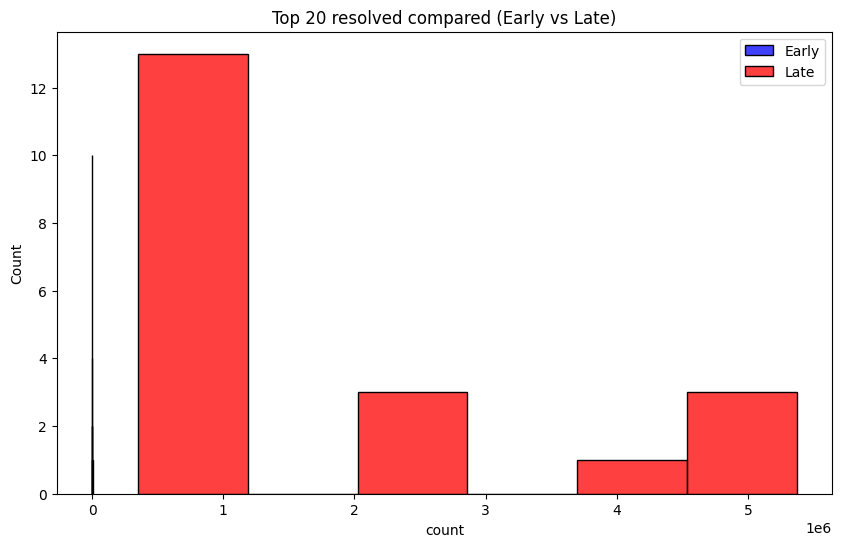

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split dataset into two subsets: early vs late hours
df['hour'] = df['time'] // 3600
early_df = df[df['hour'] < 12]   # queries before noon
late_df  = df[df['hour'] >= 12]  # queries after noon

# Choose categorical columns to compare
categorical_cols = ['source', 'resolved']

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(early_df[col].value_counts().head(20), 
                 color='blue', label='Early', kde=False)
    sns.histplot(late_df[col].value_counts().head(20), 
                 color='red', label='Late', kde=False)
    plt.title(f"Top 20 {col} compared (Early vs Late)")
    plt.legend()
    plt.show()


Sample size: (20411, 4)


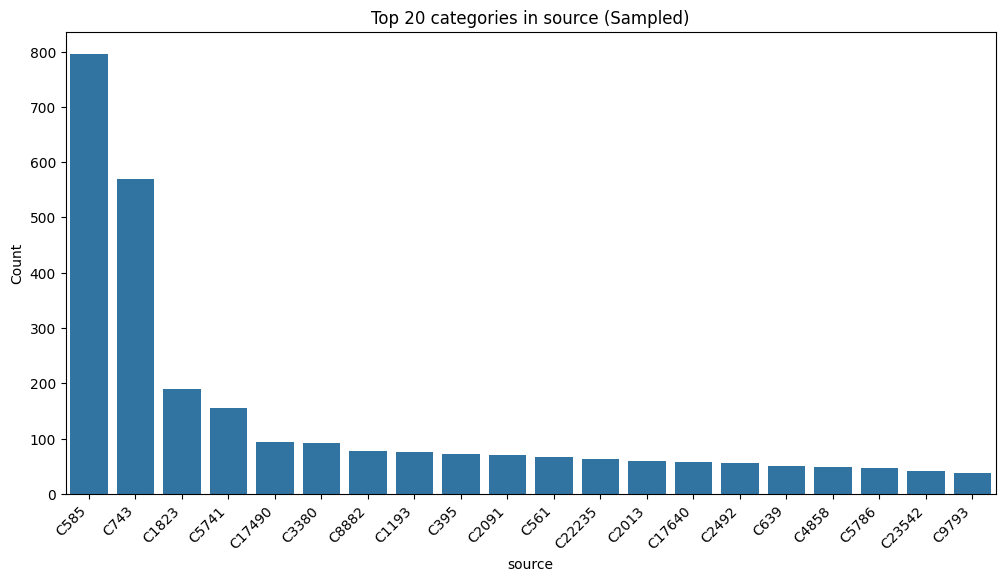

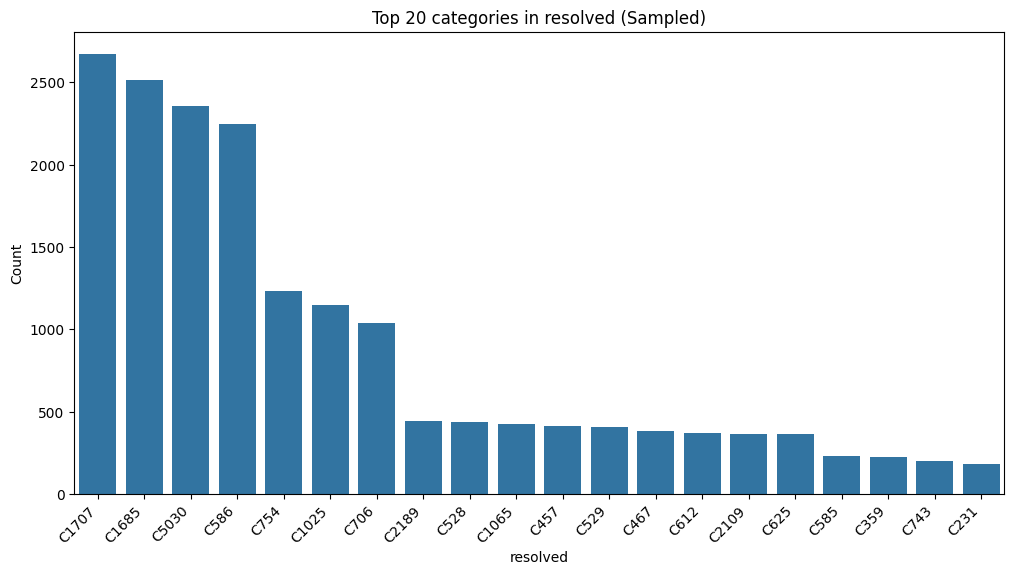

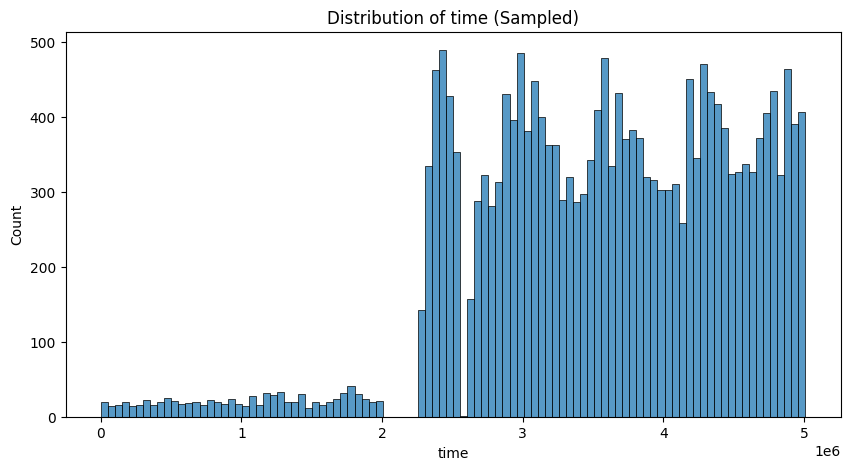

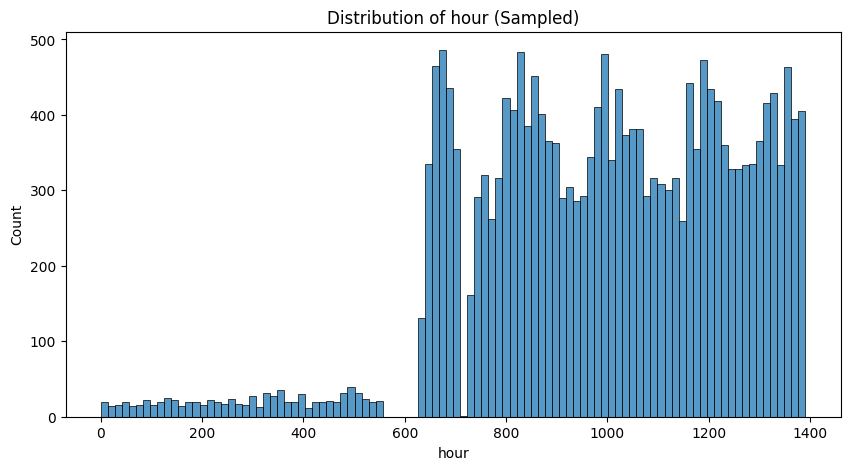

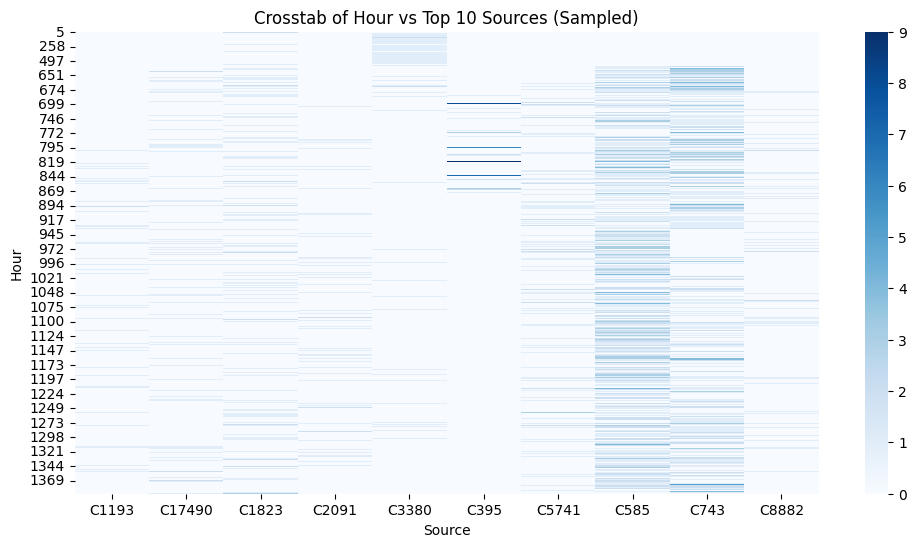

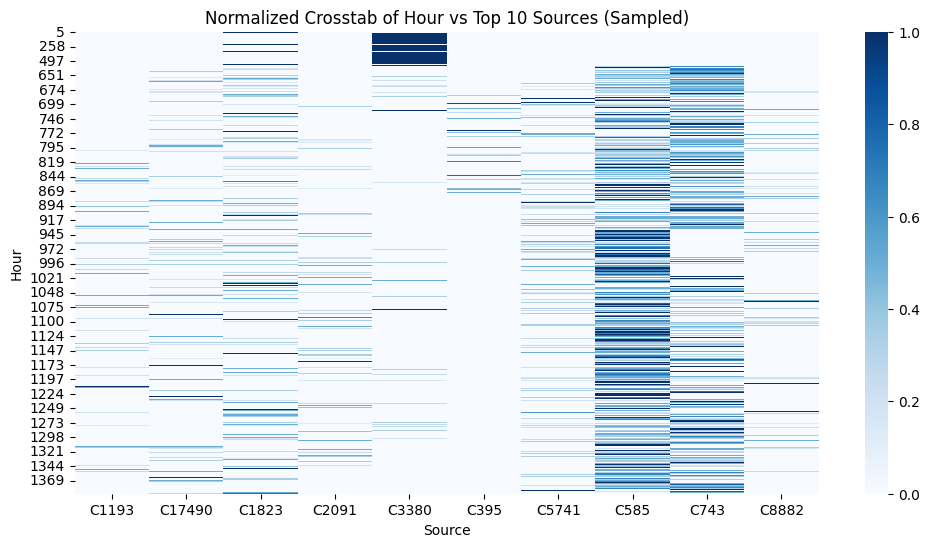

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fraction-based sampling (lighter on memory)
# Adjust frac depending on your RAM (0.0005 = 0.05% of data)
sample_df = df.sample(frac=0.0005, random_state=42)
print("Sample size:", sample_df.shape)

# Create hour column
sample_df['hour'] = sample_df['time'] // 3600

# 🔹 Block 1: Top categories (object columns)
def plot_top_categories(data, top_n=20):
    for col in data.select_dtypes('object'):
        top_vals = data[col].value_counts().head(top_n).index
        plt.figure(figsize=(12,6))
        sns.countplot(x=col, data=data[data[col].isin(top_vals)], order=top_vals)
        plt.title(f"Top {top_n} categories in {col} (Sampled)")
        plt.xticks(rotation=45, ha='right')
        plt.ylabel("Count")
        plt.show()

plot_top_categories(sample_df, top_n=20)

# 🔹 Block 2: Numeric distributions
for col in sample_df.select_dtypes(include=['int64','float']):
    plt.figure(figsize=(10,5))
    sns.histplot(sample_df[col], bins=100, kde=False)
    plt.title(f"Distribution of {col} (Sampled)")
    plt.show()

# 🔹 Block 3: Crosstab heatmap (Hour vs Top Sources)
# Limit to top 10 sources to avoid huge matrix
top_sources = sample_df['source'].value_counts().head(10).index
filtered_df = sample_df[sample_df['source'].isin(top_sources)]

ct = pd.crosstab(filtered_df['hour'], filtered_df['source'])

plt.figure(figsize=(12,6))
sns.heatmap(ct, cmap="Blues")
plt.title("Crosstab of Hour vs Top 10 Sources (Sampled)")
plt.xlabel("Source")
plt.ylabel("Hour")
plt.show()

# 🔹 Block 4: Normalized Crosstab (proportions)
ct_norm = pd.crosstab(filtered_df['hour'], filtered_df['source'], normalize='index')

plt.figure(figsize=(12,6))
sns.heatmap(ct_norm, cmap="Blues")
plt.title("Normalized Crosstab of Hour vs Top 10 Sources (Sampled)")
plt.xlabel("Source")
plt.ylabel("Hour")
plt.show()


In [23]:
import pandas as pd

# Crosstab between source and resolved
ct = pd.crosstab(df['source'], df['resolved'])

print(ct.head())  # show first rows


resolved  C1  C10  C1000  C10000  C10001  C10003  C10005  C10008  C1001  \
source                                                                    
C1         0    0      0       0       0       0       0       0      0   
C10        0  565      0       0       0       0       0       0      0   
C100       0    0      0       0       0       0       0       0      0   
C1000      0  177      0       0       0       0       0       0      0   
C10000     0    0      0       0       0       0       0       0      0   

resolved  C10010  ...  C998  C9984  C9986  C9988  C999  C9990  C9992  C9994  \
source            ...                                                         
C1             0  ...     0      0      0      0     0      0      0      0   
C10            0  ...     0      0      0      0     0      0      0      0   
C100           0  ...     0      0      0      0     0      0      0      0   
C1000          0  ...     0      0      0      0     0      0      0      0   


Sample size: (20411, 4)


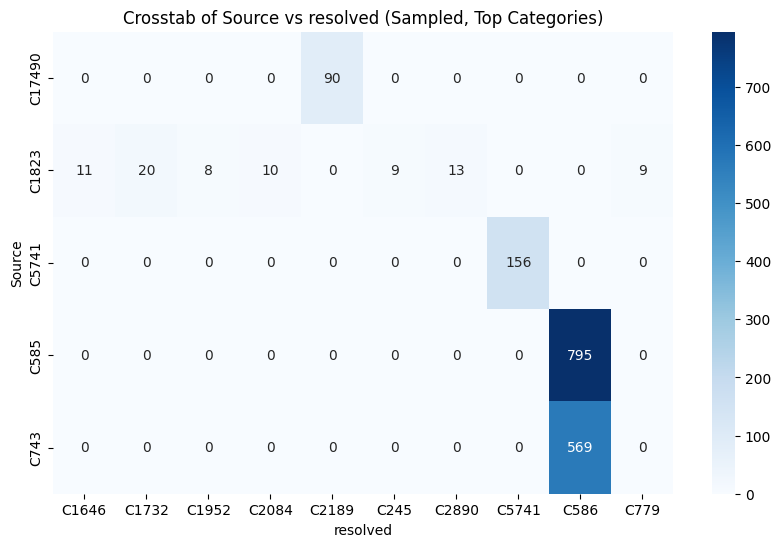

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fraction-based sampling (lighter on memory)
sample_df = df.sample(frac=0.0005, random_state=42)
print("Sample size:", sample_df.shape)

# Create hour column
sample_df['hour'] = sample_df['time'] // 3600

# Define "viral_columns" equivalent → categorical features you want to cross-tab
viral_columns = ['resolved']   # you can add more if needed

# Limit to top categories to avoid huge matrices
top_sources = sample_df['source'].value_counts().head(5).index
filtered_df = sample_df[sample_df['source'].isin(top_sources)]

# 🔹 Crosstab heatmaps
for col in viral_columns:
    # Limit to top categories for the column
    top_vals = filtered_df[col].value_counts().head(10).index
    sub_df = filtered_df[filtered_df[col].isin(top_vals)]

    ct = pd.crosstab(sub_df['source'], sub_df[col])

    plt.figure(figsize=(10,6))
    sns.heatmap(ct, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Crosstab of Source vs {col} (Sampled, Top Categories)")
    plt.xlabel(col)
    plt.ylabel("Source")
    plt.show()


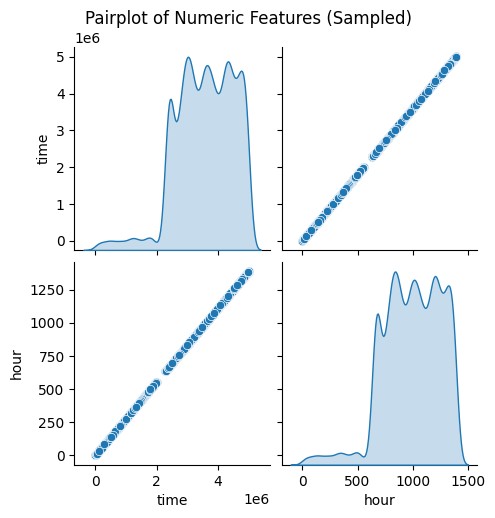

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Select only numeric columns
numeric_cols = sample_df.select_dtypes(include=['int64','float']).columns

# 🔹 Pairplot on numeric features
sns.pairplot(sample_df[numeric_cols], diag_kind="kde")
plt.suptitle("Pairplot of Numeric Features (Sampled)", y=1.02)
plt.show()


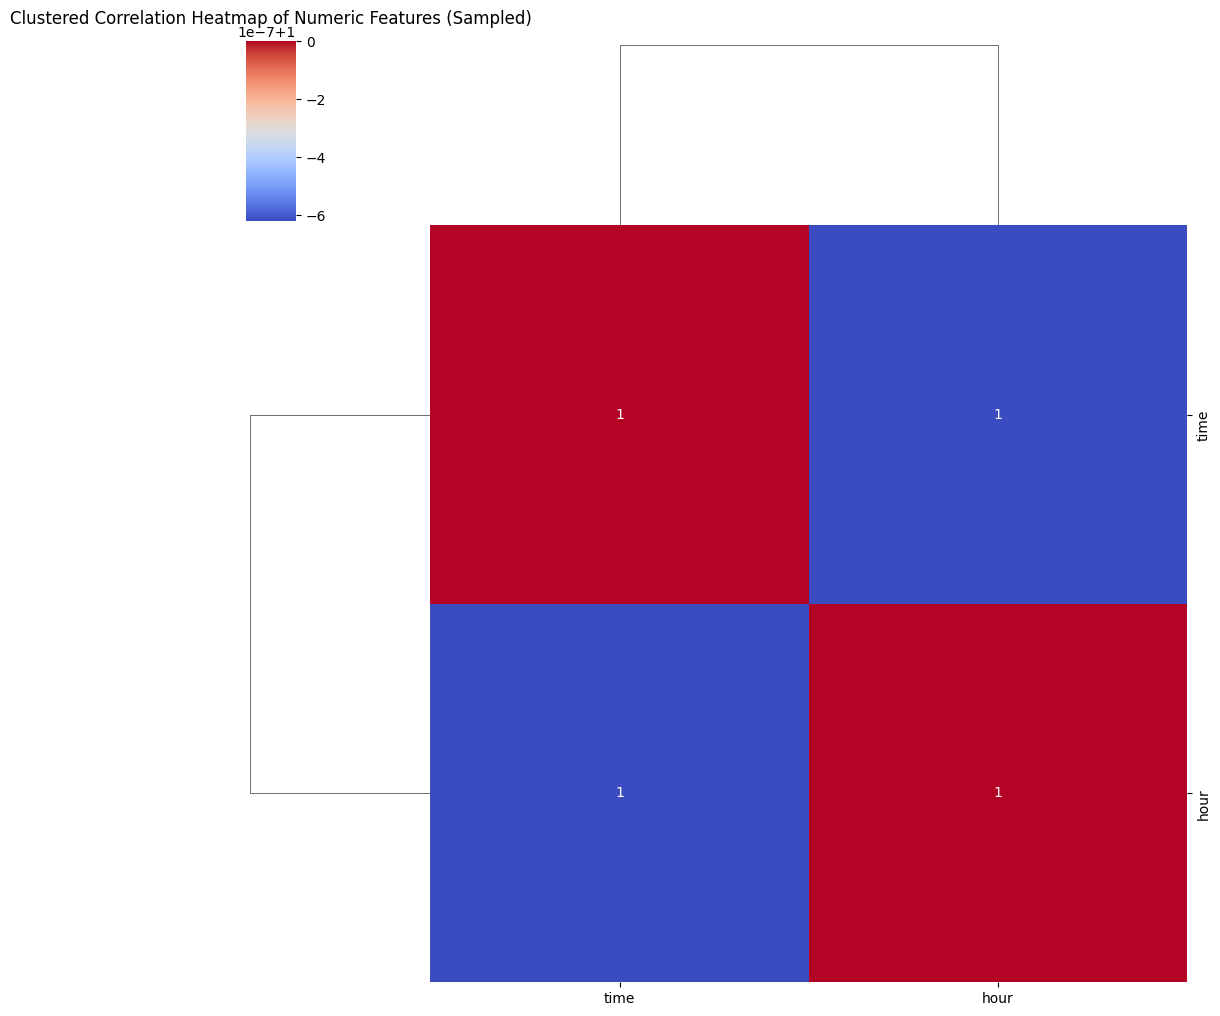

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Select numeric columns only
numeric_cols = sample_df.select_dtypes(include=['int64','float']).columns

# 🔹 Compute correlation matrix
corr_matrix = sample_df[numeric_cols].corr()

# 🔹 Clustered heatmap
sns.clustermap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Clustered Correlation Heatmap of Numeric Features (Sampled)", y=1.05)
plt.show()


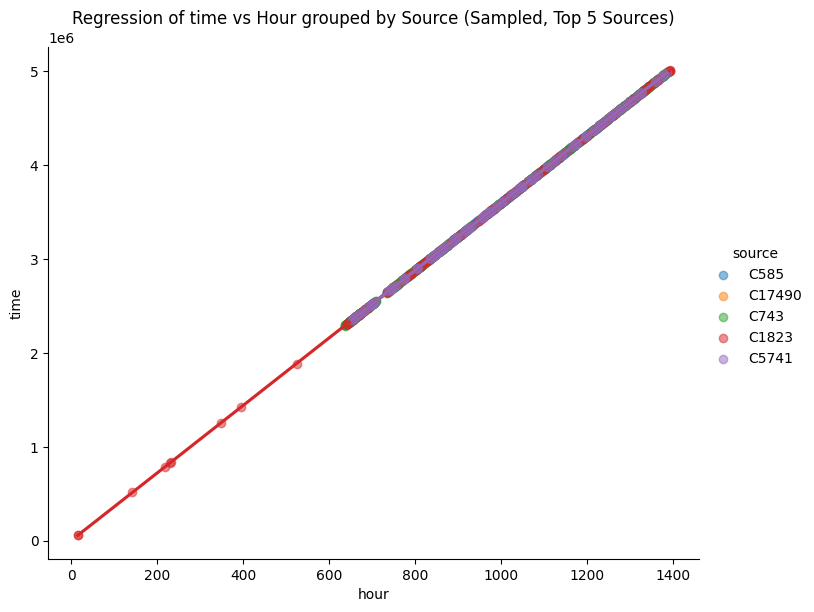

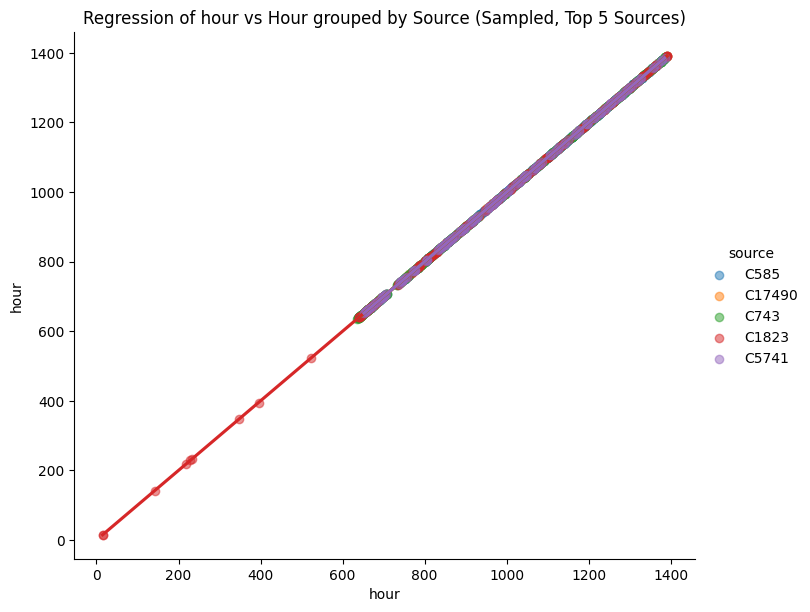

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fraction-based sampling
sample_df = df.sample(frac=0.0005, random_state=42)
sample_df['hour'] = sample_df['time'] // 3600

# Limit to top 5 sources for clarity
top_sources = sample_df['source'].value_counts().head(5).index
filtered_df = sample_df[sample_df['source'].isin(top_sources)]

# 🔹 Example: scatter + regression lines
for col in ['time', 'hour']:
    sns.lmplot(x='hour', y=col, hue='source', data=filtered_df,
               height=6, aspect=1.2, scatter_kws={'alpha':0.5})
    plt.title(f"Regression of {col} vs Hour grouped by Source (Sampled, Top 5 Sources)")
    plt.show()


In [28]:
import pandas as pd

# ✅ Select numeric columns
numeric_cols = sample_df.select_dtypes(include=['int64','float']).columns

# 🔹 Correlations with 'hour'
corr_with_hour = sample_df[numeric_cols].corr()['hour'].sort_values()
print(corr_with_hour)

# 🔹 Correlations with 'time'
corr_with_time = sample_df[numeric_cols].corr()['time'].sort_values()
print(corr_with_time)


time    0.999999
hour    1.000000
Name: hour, dtype: float64
hour    0.999999
time    1.000000
Name: time, dtype: float64


resolved  C1685  C5030  C586
source                      
C17490        3      0     0
C585          1      0   795
C743          0      1   569


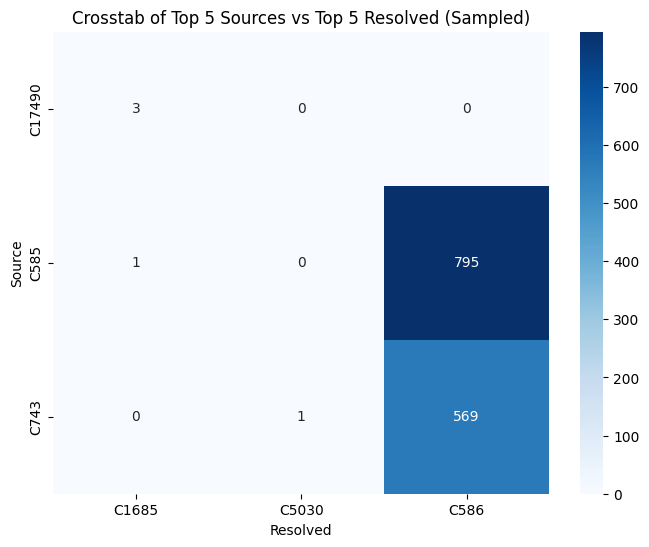

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fraction-based sampling
sample_df = df.sample(frac=0.0005, random_state=42)

# Limit to top categories
top_sources = sample_df['source'].value_counts().head(5).index
top_resolved = sample_df['resolved'].value_counts().head(5).index

filtered_df = sample_df[
    sample_df['source'].isin(top_sources) & sample_df['resolved'].isin(top_resolved)
]

# 🔹 Crosstab between source and resolved
ct = pd.crosstab(filtered_df['source'], filtered_df['resolved'])
print(ct)

# 🔹 Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt='d', cmap="Blues")
plt.title("Crosstab of Top 5 Sources vs Top 5 Resolved (Sampled)")
plt.xlabel("Resolved")
plt.ylabel("Source")
plt.show()


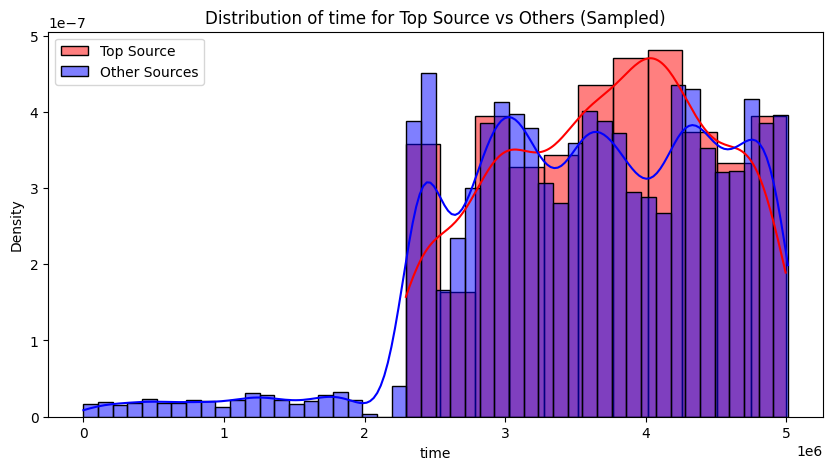

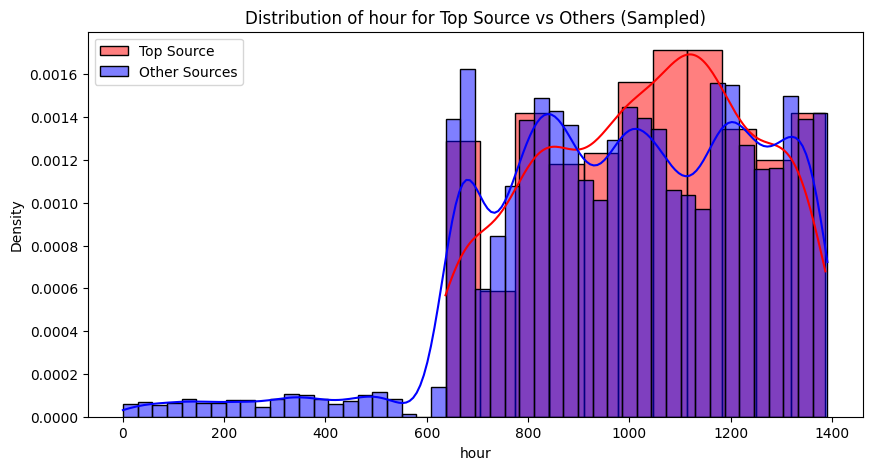

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fraction-based sampling
sample_df = df.sample(frac=0.0005, random_state=42)
sample_df['hour'] = sample_df['time'] // 3600

# Example grouping: split into two sets of sources
top_sources = sample_df['source'].value_counts().head(1).index
malade_df = sample_df[sample_df['source'].isin(top_sources)]       # "malade" group
non_malade_df = sample_df[~sample_df['source'].isin(top_sources)]  # "non malade" group

# 🔹 Compare distributions of numeric features
for col in ['time', 'hour']:
    plt.figure(figsize=(10,5))
    sns.histplot(malade_df[col], label='Top Source', color='red', kde=True, stat='density')
    sns.histplot(non_malade_df[col], label='Other Sources', color='blue', kde=True, stat='density')
    plt.title(f"Distribution of {col} for Top Source vs Others (Sampled)")
    plt.legend()
    plt.show()



📈 Matrice de corrélation:


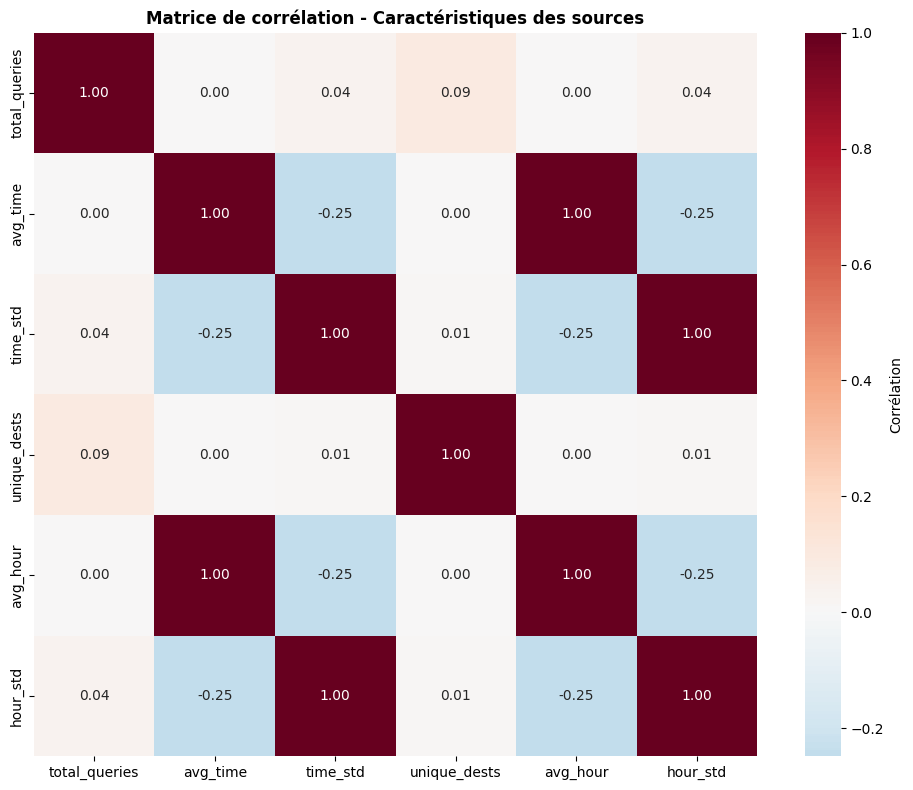


Observations des corrélations:
  • total_queries vs unique_dests: 0.09 - Les sources actives ont tendance à contacter plus de destinations
  • avg_hour vs hour_std: -0.25 - Les sources actives à certaines heures ont des patterns plus réguliers


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n📈 Matrice de corrélation:")

# ✅ Create aggregated features for each source
source_features = df.groupby('source').agg({
    'time': ['count', 'mean', 'std'],
    'resolved': 'nunique',
    'hour': ['mean', 'std']
}).round(2)

# Flatten column names
source_features.columns = ['_'.join(col).strip() for col in source_features.columns.values]
source_features = source_features.rename(columns={
    'time_count': 'total_queries',
    'time_mean': 'avg_time',
    'time_std': 'time_std',
    'resolved_nunique': 'unique_dests',
    'hour_mean': 'avg_hour',
    'hour_std': 'hour_std'
})

# 🔹 Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = source_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Corrélation'})
plt.title('Matrice de corrélation - Caractéristiques des sources', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nObservations des corrélations:")
if 'corr_matrix' in locals():
    print("  • total_queries vs unique_dests: {:.2f} - Les sources actives ont tendance à contacter plus de destinations"
          .format(corr_matrix.loc['total_queries', 'unique_dests']))
    print("  • avg_hour vs hour_std: {:.2f} - Les sources actives à certaines heures ont des patterns plus réguliers"
          .format(corr_matrix.loc['avg_hour', 'hour_std']))


In [33]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
source_features['anomaly'] = iso.fit_predict(source_features)

print(source_features['anomaly'].value_counts())


anomaly
 1    14862
-1      151
Name: count, dtype: int64


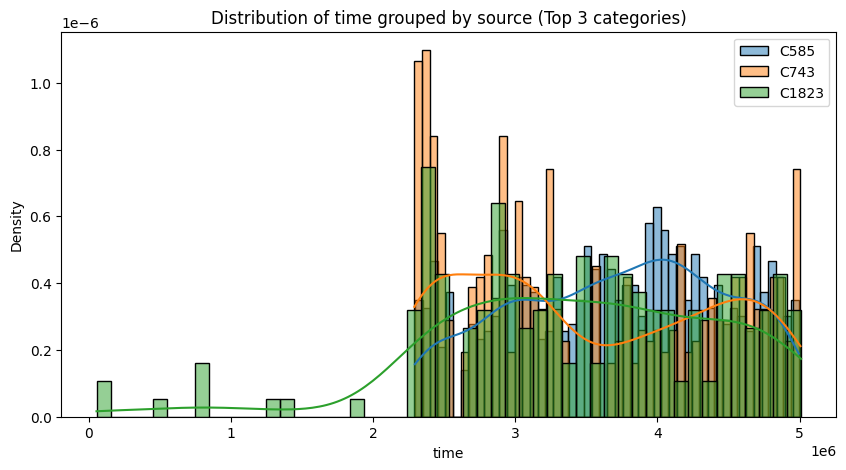

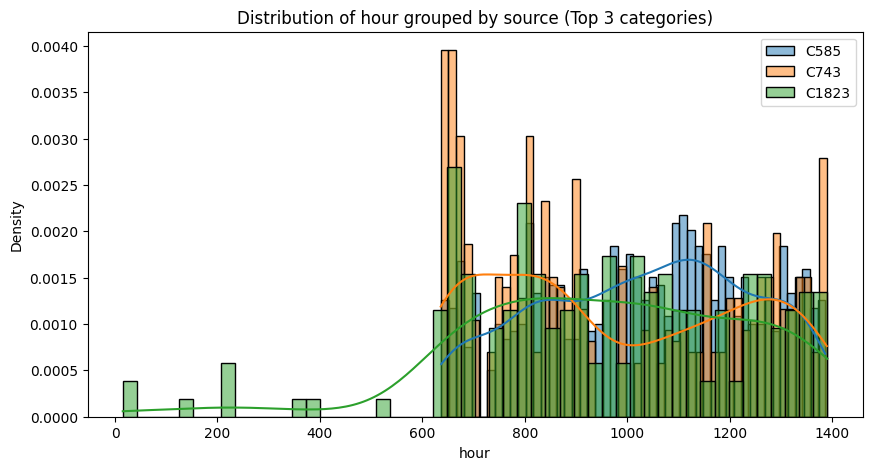

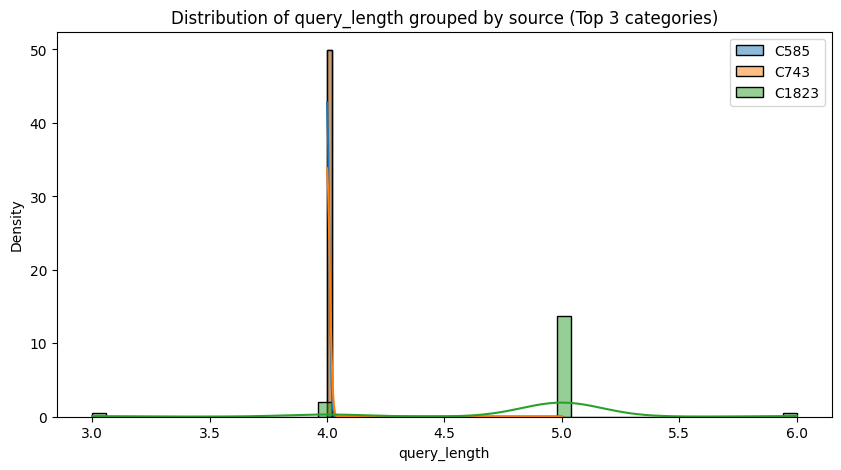

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fraction-based sampling
sample_df = df.sample(frac=0.0005, random_state=42)
sample_df['hour'] = sample_df['time'] // 3600
sample_df['query_length'] = sample_df['resolved'].str.len()

# Choose numeric columns to analyze
numeric_cols = ['time', 'hour', 'query_length']

# Choose categorical grouping (example: 'source')
group_col = 'source'

# Limit categories to top N for clarity
top_groups = sample_df[group_col].value_counts().head(3).index
filtered_df = sample_df[sample_df[group_col].isin(top_groups)]

# 🔹 Distribution plots by group
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    for cat in top_groups:
        sns.histplot(filtered_df[filtered_df[group_col]==cat][col],
                     label=cat, kde=True, stat='density', bins=50, alpha=0.5)
    plt.title(f"Distribution of {col} grouped by {group_col} (Top 3 categories)")
    plt.legend()
    plt.show()


In [38]:
import pandas as pd

# ✅ Select a subset of categorical columns (example: source and resolved)
dns_columns = ['source', 'resolved']
df1 = df[dns_columns].copy()   # <-- safe copy

df1['internal'] = df['resolved'].str.endswith('.local')

distribution = df1.dropna()['internal'].value_counts(normalize=True)
print("\n📊 Normalized distribution of internal vs external queries:")
print(distribution)




📊 Normalized distribution of internal vs external queries:
internal
False    1.0
Name: proportion, dtype: float64


In [40]:
from scipy.stats import ttest_ind

In [42]:
import pandas as pd

# Example: filter rows where resolved host ends with ".com"
positive_df = df[df['resolved'].str.endswith('.com')].copy()

print("Subset size:", positive_df.shape)
print(positive_df.head())


Subset size: (0, 4)
Empty DataFrame
Columns: [time, source, resolved, hour]
Index: []


In [44]:
import pandas as pd
from scipy.stats import ttest_ind

# ✅ Define positive vs negative groups (example: .com vs non-.com domains)
positive_df = df[df['resolved'].str.endswith('.com')].copy()
negative_df = df[~df['resolved'].str.endswith('.com')].copy()

# ✅ Balance negative sample size to match positive
if positive_df.shape[0] > 0 and negative_df.shape[0] > 0:
    balanced_neg = negative_df.sample(min(positive_df.shape[0], negative_df.shape[0]), random_state=42)
else:
    print("⚠️ One of the groups is empty, cannot run t-test.")

# ✅ Define t-test function with sample size check
def t_test(col, alpha=0.02):
    pos = positive_df[col].dropna()
    neg = balanced_neg[col].dropna()
    if len(pos) < 10 or len(neg) < 10:   # require minimum sample size
        return f"Not enough data (pos={len(pos)}, neg={len(neg)})"
    stat, p = ttest_ind(pos, neg, equal_var=False)
    return "H0 Rejetée" if p < alpha else f"H0 Acceptée (p={p:.4f})"

# ✅ Apply t-test to numeric columns
numeric_cols = ['time','hour']  # add more numeric features if available
results = {col: t_test(col) for col in numeric_cols}

print("\n📊 Résultats des t-tests:")
for col, res in results.items():
    print(f"  • {col}: {res}")


⚠️ One of the groups is empty, cannot run t-test.

📊 Résultats des t-tests:
  • time: Not enough data (pos=0, neg=0)
  • hour: Not enough data (pos=0, neg=0)
